In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torchvision
from torch.utils import data
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import io, transform

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [2]:
import os
from os.path import join
import json
import random
import itertools
import re
import datetime
import cairocffi as cairo
import editdistance
import numpy as np
from scipy import ndimage
import pylab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import cv2

In [3]:
def get_counter(dirpath, tag):
    dirname = os.path.basename(dirpath)
    ann_dirpath = join(dirpath, 'ann')
    letters = ''
    lens = []
    for filename in os.listdir(ann_dirpath):
        json_filepath = join(ann_dirpath, filename)
        ann = json.load(open(json_filepath, 'r'))
        tags = ann['tags']
        if tag in tags:
            description = ann['description']
            lens.append(len(description))
            letters += description
    print('Max plate length in "%s":' % dirname, max(Counter(lens).keys()))
    return Counter(letters)
c_val = get_counter('data/anpr_ocr__train', 'val')
c_train = get_counter('data/anpr_ocr__train', 'train')
letters_train = set(c_train.keys())
letters_val = set(c_val.keys())
if letters_train == letters_val:
    print('Letters in train and val do match')
else:
    raise Exception()
# print(len(letters_train), len(letters_val), len(letters_val | letters_train))
letters = sorted(list(letters_train))
print('Letters:', ' '.join(letters))

Max plate length in "anpr_ocr__train": 8
Max plate length in "anpr_ocr__train": 8
Letters in train and val do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y


In [4]:
def labels_to_text(labels):
    return ''.join(list(map(lambda x: letters[int(x)], labels)))

def text_to_labels(text):
    return list(map(lambda x: letters.index(x), text))

def is_valid_str(s):
    for ch in s:
        if not ch in letters:
            return False
    return True


In [32]:
class NumberPlateDataset(Dataset):
    def __init__(self,dirpath
                 ,img_h, img_w):
        self.img_w = img_w
        self.img_h = img_h
        self.dirpath = dirpath       
   
    def __getitem__(self, i):
        #the description of image
        img_dirpath = join(self.dirpath, 'img')
        print(img_dirpath)
        self.label = []
        filename = os.listdir(img_dirpath)
        name, ext = os.path.splitext(filename[i])
        print(name,ext)
        self.label.append([name])
        
        #reading the images in folder "img"
        #img = cv2.imread(join(img_dirpath,filename[i]))
        img = io.imread(join(img_dirpath,filename[i]))
        #img = Image.open(join(img_dirpath,filename[i]))

        print(filename[i])
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       # img = cv2.resize(img, (self.img_h, self.img_w))
        img = img.astype(np.float32)
        #img /= 255
        print(np.shape(img))
        sample = {'image': img}
        return sample, self.label
    
    def __len__(self):
        img_dirpath = join(self.dirpath, 'img')
        filename = os.listdir(img_dirpath)
        return len(filename)

In [40]:
plate_dataset = NumberPlateDataset(dirpath='data/anpr_ocr__train'
                                   ,img_w = 64,img_h=128 )

In [41]:
def imgshow_(dirpath):
             #,  img_h, img_w)
    #self.dirpath = dirpath  
    img_dirpath = join(dirpath, 'img')
    print(img_dirpath)
    
    filename = os.listdir(img_dirpath)        
    #reading the images in folder "img"
    #img = cv2.imread(join(img_dirpath,filename[i]))
    img = io.imread(join(img_dirpath,filename[i]), as_grey = True)
        #img = Image.open(join(img_dirpath,filename[i]))

    print(filename[i])
    print(np.shape(img))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # img = cv2.resize(img, (self.img_h, self.img_w))
    #img = img.astype(np.float32)
    img /= 255
    plt.show() 

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

p_trainloader = torch.utils.data.DataLoader(plate_dataset, batch_size=100,
                                          shuffle=True)



In [43]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [44]:
dataiter = iter(p_trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))


data/anpr_ocr__train/img
M303YY30 .png
M303YY30.png
(34, 152)
data/anpr_ocr__train/img
C023XK37 .png
C023XK37.png
(34, 152)
data/anpr_ocr__train/img
X347TB89 .png
X347TB89.png
(34, 152)
data/anpr_ocr__train/img
M045BB14 .png
M045BB14.png
(34, 152)
data/anpr_ocr__train/img
O543OO17 .png
O543OO17.png
(34, 152)
data/anpr_ocr__train/img
B668OP92 .png
B668OP92.png
(34, 152)
data/anpr_ocr__train/img
M278CY68 .png
M278CY68.png
(34, 152)
data/anpr_ocr__train/img
A455TC98 .png
A455TC98.png
(34, 152)
data/anpr_ocr__train/img
H570KB63 .png
H570KB63.png
(34, 152)
data/anpr_ocr__train/img
M607PO26 .png
M607PO26.png
(34, 152)
data/anpr_ocr__train/img
H718KT61 .png
H718KT61.png
(34, 152)
data/anpr_ocr__train/img
O324EA54 .png
O324EA54.png
(34, 152)
data/anpr_ocr__train/img
O077XM51 .png
O077XM51.png
(34, 152)
data/anpr_ocr__train/img
A716BA87 .png
A716BA87.png
(34, 152)
data/anpr_ocr__train/img
Y885OT15 .png
Y885OT15.png
(34, 152)
data/anpr_ocr__train/img
X882XE52 .png
X882XE52.png
(34, 152)
data/anp

TypeError: 'module' object is not callable

data/anpr_ocr__train/img
A676AP95 .png
A676AP95.png
(34, 152)
<class 'tuple'>
0 (2,)


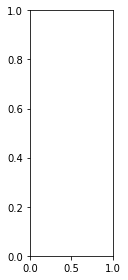

data/anpr_ocr__train/img
H375OY42 .png
H375OY42.png
(34, 152)
<class 'tuple'>
1 (2,)


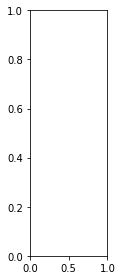

data/anpr_ocr__train/img
B880KH57 .png
B880KH57.png
(34, 152)
<class 'tuple'>
2 (2,)


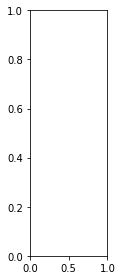

data/anpr_ocr__train/img
M832XM11 .png
M832XM11.png
(34, 152)
<class 'tuple'>
3 (2,)


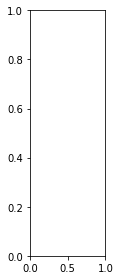

In [45]:
for i in range(len(plate_dataset)):
    sample = plate_dataset[i]
    print(type(sample))
    print(i,np.shape(sample))
    i_mage = sample[0]
    #print(sample['image'])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    #ax.axis('off')
    plt.show(i_mage)
    if i == 3:     
        break
  

In [46]:
for i in range(len(p_trainloader)):
    dataiter = iter(p_trainloader)
    images, labels = dataiter.next()
    sample = p_trainloader[i]
    print(i, sample['image'].size())
    
    if i == 3:
        break
        
        
for i in range(len(plate_dataset)):
    sample = plate_dataset[i]
    print(type(sample))
    print(i,np.shape(sample))
    i_mage = sample[0]
    #print(sample['image'])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    #ax.axis('off')
    plt.show(i_mage)
    if i == 3:     
        break


data/anpr_ocr__train/img
O708XP01 .png
O708XP01.png
(34, 152)
data/anpr_ocr__train/img
X154OO42 .png
X154OO42.png
(34, 152)
data/anpr_ocr__train/img
B788BM25 .png
B788BM25.png
(34, 152)
data/anpr_ocr__train/img
H667MP25 .png
H667MP25.png
(34, 152)
data/anpr_ocr__train/img
T542MP07 .png
T542MP07.png
(34, 152)
data/anpr_ocr__train/img
H253OY21 .png
H253OY21.png
(34, 152)
data/anpr_ocr__train/img
A677PH38 .png
A677PH38.png
(34, 152)
data/anpr_ocr__train/img
A551YA49 .png
A551YA49.png
(34, 152)
data/anpr_ocr__train/img
K341HT37 .png
K341HT37.png
(34, 152)
data/anpr_ocr__train/img
Y068OB94 .png
Y068OB94.png
(34, 152)
data/anpr_ocr__train/img
K127OY13 .png
K127OY13.png
(34, 152)
data/anpr_ocr__train/img
O844EK42 .png
O844EK42.png
(34, 152)
data/anpr_ocr__train/img
H513OO27 .png
H513OO27.png
(34, 152)
data/anpr_ocr__train/img
K773HP31 .png
K773HP31.png
(34, 152)
data/anpr_ocr__train/img
Y671OM82 .png
Y671OM82.png
(34, 152)
data/anpr_ocr__train/img
C668PM75 .png
C668PM75.png
(34, 152)
data/anp

TypeError: 'DataLoader' object does not support indexing

data/anpr_ocr__train/img
M138HM06 .png
M138HM06.png
(34, 152)
data/anpr_ocr__train/img
E050MK57 .png
E050MK57.png
(34, 152)
data/anpr_ocr__train/img
P785CP25 .png
P785CP25.png
(34, 152)
data/anpr_ocr__train/img
Y771PP45 .png
Y771PP45.png
(34, 152)
data/anpr_ocr__train/img
X857TO10 .png
X857TO10.png
(34, 152)
data/anpr_ocr__train/img
C638MY52 .png
C638MY52.png
(34, 152)
data/anpr_ocr__train/img
H725TH18 .png
H725TH18.png
(34, 152)
data/anpr_ocr__train/img
C475BC81 .png
C475BC81.png
(34, 152)
data/anpr_ocr__train/img
E705HY60 .png
E705HY60.png
(34, 152)
data/anpr_ocr__train/img
M020OY80 .png
M020OY80.png
(34, 152)
data/anpr_ocr__train/img
K014BA55 .png
K014BA55.png
(34, 152)
data/anpr_ocr__train/img
K054KH77 .png
K054KH77.png
(34, 152)
data/anpr_ocr__train/img
O868PY07 .png
O868PY07.png
(34, 152)
data/anpr_ocr__train/img
B171AC69 .png
B171AC69.png
(34, 152)
data/anpr_ocr__train/img
X614PC95 .png
X614PC95.png
(34, 152)
data/anpr_ocr__train/img
A188HM34 .png
A188HM34.png
(34, 152)
data/anp

Y486KM98 .png
Y486KM98.png
(34, 152)
data/anpr_ocr__train/img
M418TE15 .png
M418TE15.png
(34, 152)
data/anpr_ocr__train/img
C078AO44 .png
C078AO44.png
(34, 152)
data/anpr_ocr__train/img
T184EX68 .png
T184EX68.png
(34, 152)
data/anpr_ocr__train/img
O384XX40 .png
O384XX40.png
(34, 152)
data/anpr_ocr__train/img
P185OK68 .png
P185OK68.png
(34, 152)
data/anpr_ocr__train/img
K503YY11 .png
K503YY11.png
(34, 152)
data/anpr_ocr__train/img
A080YA72 .png
A080YA72.png
(34, 152)
data/anpr_ocr__train/img
P632MO47 .png
P632MO47.png
(34, 152)
data/anpr_ocr__train/img
K355OE25 .png
K355OE25.png
(34, 152)
data/anpr_ocr__train/img
E688EO01 .png
E688EO01.png
(34, 152)
data/anpr_ocr__train/img
H518EO14 .png
H518EO14.png
(34, 152)
data/anpr_ocr__train/img
Y054XP52 .png
Y054XP52.png
(34, 152)
data/anpr_ocr__train/img
O803KH82 .png
O803KH82.png
(34, 152)
data/anpr_ocr__train/img
P322YM29 .png
P322YM29.png
(34, 152)
data/anpr_ocr__train/img
H000AT04 .png
H000AT04.png
(34, 152)
data/anpr_ocr__train/img
A226BT56

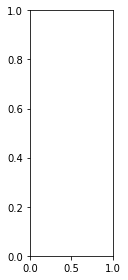

data/anpr_ocr__train/img
O068CT86 .png
O068CT86.png
(34, 152)
data/anpr_ocr__train/img
O236OE59 .png
O236OE59.png
(34, 152)
data/anpr_ocr__train/img
P152BE24 .png
P152BE24.png
(34, 152)
data/anpr_ocr__train/img
H774TK45 .png
H774TK45.png
(34, 152)
data/anpr_ocr__train/img
M530TX66 .png
M530TX66.png
(34, 152)
data/anpr_ocr__train/img
X546YH50 .png
X546YH50.png
(34, 152)
data/anpr_ocr__train/img
K822MP83 .png
K822MP83.png
(34, 152)
data/anpr_ocr__train/img
A812MO20 .png
A812MO20.png
(34, 152)
data/anpr_ocr__train/img
E015CP64 .png
E015CP64.png
(34, 152)
data/anpr_ocr__train/img
H402HK08 .png
H402HK08.png
(34, 152)
data/anpr_ocr__train/img
P741ET78 .png
P741ET78.png
(34, 152)
data/anpr_ocr__train/img
O564XH80 .png
O564XH80.png
(34, 152)
data/anpr_ocr__train/img
A346HX25 .png
A346HX25.png
(34, 152)
data/anpr_ocr__train/img
O022PA73 .png
O022PA73.png
(34, 152)
data/anpr_ocr__train/img
O707OX55 .png
O707OX55.png
(34, 152)
data/anpr_ocr__train/img
C543OT27 .png
C543OT27.png
(34, 152)
data/anp

C724MO51 .png
C724MO51.png
(34, 152)
data/anpr_ocr__train/img
C578TH68 .png
C578TH68.png
(34, 152)
data/anpr_ocr__train/img
P235OO32 .png
P235OO32.png
(34, 152)
data/anpr_ocr__train/img
M671AB83 .png
M671AB83.png
(34, 152)
data/anpr_ocr__train/img
T784CO10 .png
T784CO10.png
(34, 152)
data/anpr_ocr__train/img
E473PA30 .png
E473PA30.png
(34, 152)
data/anpr_ocr__train/img
H148HE02 .png
H148HE02.png
(34, 152)
data/anpr_ocr__train/img
K138PP76 .png
K138PP76.png
(34, 152)
data/anpr_ocr__train/img
A812KB26 .png
A812KB26.png
(34, 152)
data/anpr_ocr__train/img
A836HC26 .png
A836HC26.png
(34, 152)
data/anpr_ocr__train/img
A357EE88 .png
A357EE88.png
(34, 152)
data/anpr_ocr__train/img
X211AE35 .png
X211AE35.png
(34, 152)
data/anpr_ocr__train/img
H781BP67 .png
H781BP67.png
(34, 152)
data/anpr_ocr__train/img
Y852PP02 .png
Y852PP02.png
(34, 152)
data/anpr_ocr__train/img
O132HX91 .png
O132HX91.png
(34, 152)
data/anpr_ocr__train/img
M561KT10 .png
M561KT10.png
(34, 152)
data/anpr_ocr__train/img
C451KK96

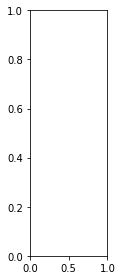

data/anpr_ocr__train/img
X844EH89 .png
X844EH89.png
(34, 152)
data/anpr_ocr__train/img
T553HT80 .png
T553HT80.png
(34, 152)
data/anpr_ocr__train/img
T834KY84 .png
T834KY84.png
(34, 152)
data/anpr_ocr__train/img
H116KA70 .png
H116KA70.png
(34, 152)
data/anpr_ocr__train/img
Y613BE10 .png
Y613BE10.png
(34, 152)
data/anpr_ocr__train/img
B042TO76 .png
B042TO76.png
(34, 152)
data/anpr_ocr__train/img
B333HK04 .png
B333HK04.png
(34, 152)
data/anpr_ocr__train/img
Y427CT44 .png
Y427CT44.png
(34, 152)
data/anpr_ocr__train/img
E650HA81 .png
E650HA81.png
(34, 152)
data/anpr_ocr__train/img
B455EP44 .png
B455EP44.png
(34, 152)
data/anpr_ocr__train/img
C807TH06 .png
C807TH06.png
(34, 152)
data/anpr_ocr__train/img
C363XB32 .png
C363XB32.png
(34, 152)
data/anpr_ocr__train/img
C720AH88 .png
C720AH88.png
(34, 152)
data/anpr_ocr__train/img
M487EC72 .png
M487EC72.png
(34, 152)
data/anpr_ocr__train/img
T005TO61 .png
T005TO61.png
(34, 152)
data/anpr_ocr__train/img
H353EO34 .png
H353EO34.png
(34, 152)
data/anp

T434YB11 .png
T434YB11.png
(34, 152)
data/anpr_ocr__train/img
H287KM95 .png
H287KM95.png
(34, 152)
data/anpr_ocr__train/img
O010EO07 .png
O010EO07.png
(34, 152)
data/anpr_ocr__train/img
M816XO64 .png
M816XO64.png
(34, 152)
data/anpr_ocr__train/img
O721XP40 .png
O721XP40.png
(34, 152)
data/anpr_ocr__train/img
O638PT80 .png
O638PT80.png
(34, 152)
data/anpr_ocr__train/img
B217KE34 .png
B217KE34.png
(34, 152)
data/anpr_ocr__train/img
H067HX19 .png
H067HX19.png
(34, 152)
data/anpr_ocr__train/img
M285OY65 .png
M285OY65.png
(34, 152)
data/anpr_ocr__train/img
P283PP58 .png
P283PP58.png
(34, 152)
data/anpr_ocr__train/img
E120HP43 .png
E120HP43.png
(34, 152)
data/anpr_ocr__train/img
B333HK04 .png
B333HK04.png
(34, 152)
data/anpr_ocr__train/img
H220EA13 .png
H220EA13.png
(34, 152)
data/anpr_ocr__train/img
M283BX17 .png
M283BX17.png
(34, 152)
data/anpr_ocr__train/img
H661BT16 .png
H661BT16.png
(34, 152)
data/anpr_ocr__train/img
Y646YT12 .png
Y646YT12.png
(34, 152)
data/anpr_ocr__train/img
M110CK22

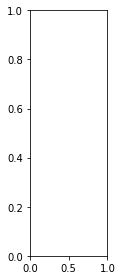

data/anpr_ocr__train/img
T784OC67 .png
T784OC67.png
(34, 152)
data/anpr_ocr__train/img
O442EB64 .png
O442EB64.png
(34, 152)
data/anpr_ocr__train/img
E320PT19 .png
E320PT19.png
(34, 152)
data/anpr_ocr__train/img
K405YY11 .png
K405YY11.png
(34, 152)
data/anpr_ocr__train/img
E287AM78 .png
E287AM78.png
(34, 152)
data/anpr_ocr__train/img
Y316XA57 .png
Y316XA57.png
(34, 152)
data/anpr_ocr__train/img
H211EX96 .png
H211EX96.png
(34, 152)
data/anpr_ocr__train/img
H377PA62 .png
H377PA62.png
(34, 152)
data/anpr_ocr__train/img
M220XB82 .png
M220XB82.png
(34, 152)
data/anpr_ocr__train/img
H217HM59 .png
H217HM59.png
(34, 152)
data/anpr_ocr__train/img
H145KM97 .png
H145KM97.png
(34, 152)
data/anpr_ocr__train/img
A816YX34 .png
A816YX34.png
(34, 152)
data/anpr_ocr__train/img
Y843HX40 .png
Y843HX40.png
(34, 152)
data/anpr_ocr__train/img
T281PA65 .png
T281PA65.png
(34, 152)
data/anpr_ocr__train/img
C180MH15 .png
C180MH15.png
(34, 152)
data/anpr_ocr__train/img
P701EC66 .png
P701EC66.png
(34, 152)
data/anp

C653YX36 .png
C653YX36.png
(34, 152)
data/anpr_ocr__train/img
X542HC73 .png
X542HC73.png
(34, 152)
data/anpr_ocr__train/img
A733OC58 .png
A733OC58.png
(34, 152)
data/anpr_ocr__train/img
M470EH62 .png
M470EH62.png
(34, 152)
data/anpr_ocr__train/img
B542CM07 .png
B542CM07.png
(34, 152)
data/anpr_ocr__train/img
P663KT50 .png
P663KT50.png
(34, 152)
data/anpr_ocr__train/img
A362MB51 .png
A362MB51.png
(34, 152)
data/anpr_ocr__train/img
C186AM29 .png
C186AM29.png
(34, 152)
data/anpr_ocr__train/img
X757XA90 .png
X757XA90.png
(34, 152)
data/anpr_ocr__train/img
O135PO49 .png
O135PO49.png
(34, 152)
data/anpr_ocr__train/img
O272CT23 .png
O272CT23.png
(34, 152)
data/anpr_ocr__train/img
C735PT64 .png
C735PT64.png
(34, 152)
data/anpr_ocr__train/img
P073TE96 .png
P073TE96.png
(34, 152)
data/anpr_ocr__train/img
K162YP98 .png
K162YP98.png
(34, 152)
data/anpr_ocr__train/img
T168AM56 .png
T168AM56.png
(34, 152)
data/anpr_ocr__train/img
K607PX70 .png
K607PX70.png
(34, 152)
data/anpr_ocr__train/img
T673YH58

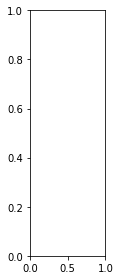

In [31]:
 for i, data in enumerate(p_trainloader, 0):
    dataiter = iter(p_trainloader)
    images, labels = dataiter.next()
    i_mage = images
    #print(sample['image'])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    #ax.axis('off')
    plt.show(i_mage)
    if i == 3:     
        break
    

In [ ]:
#Convulational layers
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3,stride = 1,padding = 1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3,stride = 1,padding = 1)
        self.mp = nn.MaxPool2d(2, padding=0)
        self.fc1 = nn.Linear(17*76*16,16*16)
        
    def forward(self, x):
        # define the acutal network
        
        
        # chain function together to form the layers
        x = F.relu(self.conv1(x))
        x = self.mp(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.view(17*76,16) 
        x = self.fc1(x)
        x = x.view(16,16) 
        return x
    
    

net = Net()
print(net)
